In [2]:
# important library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

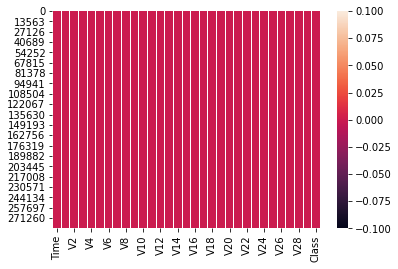

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
X=df.drop('Class',axis=1)
Y=df['Class']

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

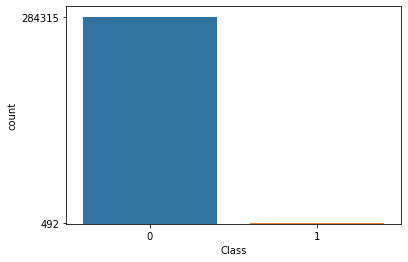

In [9]:
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [10]:
# as we see there is data imbalncing so to balnce the dataset we have to use 
#sampling technique

In [11]:
# split the dataset
#split data into training and tetsing 70 and 30 percent
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print('score',model.score(X_test,Y_test))
    print(classification_report(Y_test,Y_pred))
    print('fonfusion matrix')
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [14]:
lr=LogisticRegression()
lr=create_model(lr)

score 0.9989817773252344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.70      0.63      0.66       135

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443

fonfusion matrix
[[85271    37]
 [   50    85]]


In [15]:
# check data balancing of Y_train
pd.Series(Y_train).value_counts()


0    199007
1       357
Name: Class, dtype: int64

In [16]:
#we see there is much difference in yes and No data on training data manority is
# very less so can't use under sampling because if we use under sampling lost much 
# data and if we use under sampling we have to train model in less data its not 
# good so we use Over Sampling method 
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [17]:
# check after balancing of Y_train
pd.Series(Y_train1).value_counts()

1    199007
0    199007
dtype: int64

In [18]:
# check data balancing of Y_test
pd.Series(Y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [19]:
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [20]:
# check after balancing of Y_test
pd.Series(Y_test1).value_counts()

1    85308
0    85308
dtype: int64

In [21]:
lr.fit(X_train1,Y_train1)
Y_pred=lr.predict(X_test1)
print(classification_report(Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     85308
           1       0.97      0.87      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

[[82826  2482]
 [11484 73824]]


In [22]:
# we got 84% recall after using sampling technique
# use Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train1,Y_train1)
Y_pred=dt.predict(X_test1)
dt.score(X_test1,Y_test1)

0.8324951938856848

In [23]:
# we got 85% score 
# now use purning technique
# two type of purning technique
# 1. max_depth 2. min_sample_leaf

In [24]:
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred=model.predict(X_test1)
    print('score',model.score(X_test1,Y_test1))
    print(classification_report(Y_test1,Y_pred))
    print('fonfusion matrix')
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [25]:
dt1=DecisionTreeClassifier(max_depth=8)# max_depth can't take more than 8
dt1=create_model(dt1)

score 0.9048799643644206
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     85308
           1       0.99      0.82      0.90     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

fonfusion matrix
[[84393   915]
 [15314 69994]]


In [26]:
# after using max_depth purning method increase recall from 85 to 82 but it is not also much good 
# try other one min sample leaf 
dt2=DecisionTreeClassifier(min_samples_leaf=45) # bydefault it is gini index
dt2=create_model(dt2)

score 0.9050382144699207
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.90    170616
weighted avg       0.92      0.91      0.90    170616

fonfusion matrix
[[85089   219]
 [15983 69325]]


In [27]:
#  now entropy method of max_depth
dt3=DecisionTreeClassifier(max_depth=8,criterion='entropy')# max_depth can't take more than 8
dt3=create_model(dt3)

score 0.874730388709148
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       0.99      0.75      0.86     85308

    accuracy                           0.87    170616
   macro avg       0.90      0.87      0.87    170616
weighted avg       0.90      0.87      0.87    170616

fonfusion matrix
[[84902   406]
 [20967 64341]]


In [28]:
dt4=DecisionTreeClassifier(min_samples_leaf=45,criterion='entropy') # min sample leaf of entropy
dt4=create_model(dt4)

score 0.8975066816711211
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

fonfusion matrix
[[85124   184]
 [17303 68005]]


In [29]:
# now we see the min_sample_leaf entropy method is not good but max_depth of both and min_sample leaf of gini have same
#score of recall
# now use Ensembpling technique
# here there of four types 
#1.Naive aggregation
# a. hard voting b. soft voting 
lr=LogisticRegression()
dt=DecisionTreeClassifier()
dt1=DecisionTreeClassifier(criterion='entropy')

In [30]:
model_list=[('logistic',lr),('dt gini',dt),('dt entropy',dt1)]
from sklearn.ensemble import VotingClassifier
hvc=VotingClassifier(estimators=model_list)# bydefault hard voting
hvc=create_model(hvc)

score 0.8876893140150982
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

fonfusion matrix
[[85277    31]
 [19131 66177]]


In [31]:
# we got 78% score of reacall and heigh score of FN and have to reduce it
svc=VotingClassifier(estimators=model_list,voting='soft') # soft voting
svc=create_model(hvc)

score 0.8839675059783373
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     85308
           1       1.00      0.77      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.91      0.88      0.88    170616
weighted avg       0.91      0.88      0.88    170616

fonfusion matrix
[[85278    30]
 [19767 65541]]


In [32]:
# now use 2nd method of ensembling technique
# 2 . bootstraping 
# a. bagging  b. pasting c. random forest tree
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=900,random_state=1)
bc=create_model(bc)                   # bagging method

score 0.9158226661039996
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.97      0.86      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

fonfusion matrix
[[83060  2248]
 [12114 73194]]


In [33]:
pc=BaggingClassifier(lr,n_estimators=10,max_samples=780,random_state=1,bootstrap=False)# pasting method
pc=create_model(pc)

score 0.917188305903315
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.97      0.86      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

fonfusion matrix
[[83315  1993]
 [12136 73172]]


In [34]:
rft=BaggingClassifier(dt,n_estimators=10,max_samples=780,random_state=1)
rft=create_model(rft)    # randomforesttree

score 0.9198492521217236
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.98      0.86      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

fonfusion matrix
[[83869  1439]
 [12236 73072]]


In [35]:
# we got maximum score with random forest tree :87% recall
# we got bad recall on bagging and pasting 
# now use  3rd method of ensempling technique stacking
from mlxtend.classifier import StackingClassifier


In [36]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
dt1=DecisionTreeClassifier(criterion='entropy')
model_list=[lr,dt,dt1]
meta=LogisticRegression()
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)
sc=create_model(sc)

score 0.8876775917850612
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

fonfusion matrix
[[85275    33]
 [19131 66177]]


In [37]:
# we got 79% recall on stacking it is good but bad on confusion matrix so go ahead
# now use 4th technique of ensempling 
#4 . boosting technique
# a. Ada boost b. gradient boost c. Extream gradient boost(XG boost)
# a ADA boost 
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=75)
ada=create_model(ada)

score 0.9273163126553196
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

fonfusion matrix
[[84447   861]
 [11540 73768]]


In [38]:
# now use gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=75)# n_estimators<=100
gbc=create_model(gbc)

score 0.925194589018615
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.92    170616
weighted avg       0.93      0.93      0.92    170616

fonfusion matrix
[[84725   583]
 [12180 73128]]


In [39]:
#!pip install xgboost
from xgboost import XGBClassifier
xg=XGBClassifier(n_estimators=25,reg_alpha=1)# reg_alpa=1 means handle automatically overfitting
# reg means regularization
xg=create_model(xg)

score 0.9245850330566887
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

fonfusion matrix
[[84684   624]
 [12243 73065]]


In [40]:
# we got best score with randomforestTree 87% recall and also less score of confusion matrix FN
# Now use RandomForestTree separetly 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)
rfc=create_model(rfc)



score 0.8736988324658883
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       1.00      0.75      0.86     85308

    accuracy                           0.87    170616
   macro avg       0.90      0.87      0.87    170616
weighted avg       0.90      0.87      0.87    170616

fonfusion matrix
[[85299     9]
 [21540 63768]]


In [41]:
rfc.feature_importances_

array([0.00634365, 0.00602404, 0.00372959, 0.01246086, 0.03931858,
       0.00477004, 0.00311842, 0.00520977, 0.00658442, 0.00926943,
       0.08102006, 0.13503917, 0.16043074, 0.01325357, 0.35308046,
       0.0058478 , 0.05871538, 0.01368749, 0.00496857, 0.00903254,
       0.01275291, 0.0077257 , 0.00471034, 0.00923206, 0.00235851,
       0.00483094, 0.00671793, 0.00408264, 0.00321861, 0.01246575])

In [42]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [43]:
#SVM : Support vector machine : It is supervised learning classification algorithm
#There are different types of SVM : -
'''
1. Linear Separable data means Linear Kernal
2.  Non -Linear data
a. Polynomial Kernal function    
b. radial basis kernel function
'''

'\n1. Linear Separable data means Linear Kernal\n2.  Non -Linear data\na. Polynomial Kernal function    \nb. radial basis kernel function\n'

In [44]:
#1. Linear Separable data means Linear Kernal
from sklearn.svm import LinearSVC
#create the object of LinearSVC class
svc=LinearSVC(random_state=1)  #by default hard margin
#call function
svc=create_model(svc)

score 0.8847118675856895
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     85308
           1       0.96      0.81      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.89      0.88      0.88    170616
weighted avg       0.89      0.88      0.88    170616

fonfusion matrix
[[82208  3100]
 [16570 68738]]


In [45]:
#here recall is 79 which is good but we can more better
#means can be possible ,model is overfit  why 
#perhaps , can be no error on training time but error on testing time , 
#what  do we do ,
#add some external error on training time  if create a object of 
#LinearSVC class 

#Soft margin means to reduced overfitting situation means some error add on
#training time 
#create object of LinearSVC class
#Soft Margin
svc=LinearSVC(random_state=1,C=0.05)
#here C is parameter which is used to
#add some error on training time set error 0.05 
#call function
svc=create_model(svc)

score 0.8858137572091714
              precision    recall  f1-score   support

           0       0.82      0.98      0.90     85308
           1       0.98      0.79      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.90      0.89      0.88    170616
weighted avg       0.90      0.89      0.88    170616

fonfusion matrix
[[83615  1693]
 [17789 67519]]


In [46]:
#recall=0.84 is very good but can be much better .
#can be possible , check either dataset is  linear or  dataset is non-linear  .
#use Non-linear kernal function of SVM means 2 classes are not separatable 
#with straight line 

#there are 2 types of Non-Linear Kernal function
#here 1. polynomial kernal function : increase the low dimension to 
#high dimension
#2. radial basis kernal function  both are non-linear data


In [47]:
#2.a  polynomial Kernel function 
#from sklearn.svm import SVC 
#SVC inbuilt class for non-linear data
#create the object of SVC class
#poly_svc=SVC(random_state=1,kernel="poly")
#call function
#poly_svc=create_model(poly_svc)

In [48]:
#will not be apply polynomial kernel function in bank dataset
#we use 3 . non-linear : radial basis kernel function
#create object of SVC class(for radial-basis)
#create the object of SVC class
#radial_svc=SVC(random_state=1,kernel="rbf")
#call function
#radial_svc=create_model(radial_svc)

In [49]:
# now use Future selection technique
# there are of 4 types
# 1. filter method
# a. correaltion coefficient b. Anova test c. chi_square test
# now on correlation coefficient it is used mostly in regression so now we use directly anova test
# Anova test
from sklearn.feature_selection import SelectKBest,f_regression
anova=SelectKBest(score_func=f_regression,k=6)# k means no. of inputs 
X_train_imp=anova.fit_transform(X_train1,Y_train1)
X_test_imp=anova.transform(X_test1)

In [50]:
anova.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [51]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [53]:
# imp column v3, v10, v12, v14, v16, v17
lr=LogisticRegression()
lr.fit(X_train_imp,Y_train1)
lr.score(X_test_imp,Y_test1)

0.9270056735593379

In [54]:
# now check dataset have any negative value because chi2 not applied on negative value 
for col in X:
    print(df[col]<0)

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Name: Time, Length: 284807, dtype: bool
0          True
1         False
2          True
3          True
4          True
          ...  
284802     True
284803     True
284804    False
284805     True
284806     True
Name: V1, Length: 284807, dtype: bool
0          True
1         False
2          True
3          True
4         False
          ...  
284802    False
284803     True
284804     True
284805    False
284806     True
Name: V2, Length: 284807, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
284802     True
284803    False
284804     True
284805    False
284806    False
Name: V3, Length: 284807, dtype: bool
0         False
1         False
2         False
3          True
4         False
          ...  
284802     True
284803     True
284804     Tru

In [55]:
# we got negative value so can't use chi2 
# now 2nd future selection method is wrapper method
# a. forward method b. backward method
# apply forwad method 
columns=[]
for col in X:
    columns.append(col)
    X_new=df[columns]
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.3,random_state=1)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    score=lr.score(X_test,Y_test)
    print('columns:- ',col,'score:- ',score)


columns:-  Time score:-  0.9984199992977775
columns:-  V1 score:-  0.9982795547909132
columns:-  V2 score:-  0.9984551104244935
columns:-  V3 score:-  0.9983614807532507
columns:-  V4 score:-  0.9987828142738434
columns:-  V5 score:-  0.9987945179827488
columns:-  V6 score:-  0.9984902215512096
columns:-  V7 score:-  0.9970974801914727
columns:-  V8 score:-  0.9987242957293166
columns:-  V9 score:-  0.9977879990168884
columns:-  V10 score:-  0.9974251840408226
columns:-  V11 score:-  0.9975539248387814
columns:-  V12 score:-  0.9985721475135471
columns:-  V13 score:-  0.9983263696265346
columns:-  V14 score:-  0.9983029622087239
columns:-  V15 score:-  0.9989232587807076
columns:-  V16 score:-  0.9988530365272755
columns:-  V17 score:-  0.9990871107053826
columns:-  V18 score:-  0.9989232587807076
columns:-  V19 score:-  0.9982561473731025
columns:-  V20 score:-  0.9988881476539916
columns:-  V21 score:-  0.9983263696265346
columns:-  V22 score:-  0.9988881476539916
columns:-  V23 scor

In [56]:
#Backward Selection  : it is reverse of forward selection
# in it we take all input first and train the model then remove one by one from last 
#declare a empty column
columns=[]
X_new=X
n_col=X_new.shape[1] #no. of columns
#print(n_col)
for i in range(n_col,0,-1): 
    columns.append(X_new)
    X_train,X_test,y_train,y_test = train_test_split(X_new,Y,test_size=0.3,random_state=1)
     #create a object of LinearRegression
    lr=LogisticRegression()
    #we train the model
    lr.fit(X_train,y_train)
    #find the score
    score1=lr.score(X_test,y_test)
    print("Column : ",i, " Score : ",score1)
    X_new=X_new.iloc[:,:-1]  #iloc index location iloc[startrow:stoprow ,startcol:-1]
    #iloc[rowindex,colindex]
    print("After Remove Column : ", i)

Column :  30  Score :  0.9989817773252344
After Remove Column :  30
Column :  29  Score :  0.9990402958697612
After Remove Column :  29
Column :  28  Score :  0.9988881476539916
After Remove Column :  28
Column :  27  Score :  0.9988998513628969
After Remove Column :  27
Column :  26  Score :  0.9988998513628969
After Remove Column :  26
Column :  25  Score :  0.9988764439450862
After Remove Column :  25
Column :  24  Score :  0.9988998513628969
After Remove Column :  24
Column :  23  Score :  0.9988881476539916
After Remove Column :  23
Column :  22  Score :  0.9983263696265346
After Remove Column :  22
Column :  21  Score :  0.9988881476539916
After Remove Column :  21
Column :  20  Score :  0.9982561473731025
After Remove Column :  20
Column :  19  Score :  0.9989232587807076
After Remove Column :  19
Column :  18  Score :  0.9990871107053826
After Remove Column :  18
Column :  17  Score :  0.9988530365272755
After Remove Column :  17
Column :  16  Score :  0.9989232587807076
After 

In [57]:
# now next method is embedded method we can't use it on classification dataset because it is not 
#relevant for classification type data
# so we move to next one PCA method
#apply PCA : principal component analysis
#4. PCA means Principal Component Analysis
#Select input and output from dataset
X=df.drop("Class",axis=1)
Y=df["Class"]

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
     #create a object of LogisticRegression

In [63]:

from sklearn.decomposition import PCA
#Create object of PCA
pc=PCA(n_components=10,random_state=1)#n_components : how many principal components

In [64]:
X_train_pc=pc.fit_transform(X_train,Y_train)
X_test_pc=pc.transform(X_test)

In [65]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [66]:
#train the model
lr.fit(X_train_pc,Y_train)
#check score
lr.score(X_test_pc,Y_test)

0.9988881476539916